In [1]:
import tensorflow as tf

### 데이터 가져오기

In [7]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/255, X_test/255

### 데이터 전처리 
데이터를 28x28 크기의 2차원 이미지 형태에서 28x28x1 크기의 3차원 이미지 형태로 변환

60000은 데이터의 개수를 나타내는 차원입니다.

28은 이미지의 높이를 나타내며, 28은 이미지의 너비를 나타냅니다.

1은 이미지의 채널 수를 나타내며, 흑백 이미지의 경우 채널 수가 1입니다.

In [8]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

### 모델 생성 

In [10]:
from tensorflow.keras import layers, models

In [11]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding = 'same', activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
%%time

hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 21s 5ms/step - loss: 0.1194 - accuracy: 0.9630 - val_loss: 0.0395 - val_accuracy: 0.9871
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0471 - accuracy: 0.9844 - val_loss: 0.0369 - val_accuracy: 0.9881
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0313 - accuracy: 0.9898 - val_loss: 0.0347 - val_accuracy: 0.9891
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0297 - val_accuracy: 0.9906
CPU times: user 52.7 s, sys: 3.77 s, total: 56.5 s
Wall time: 1min 1s


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import random

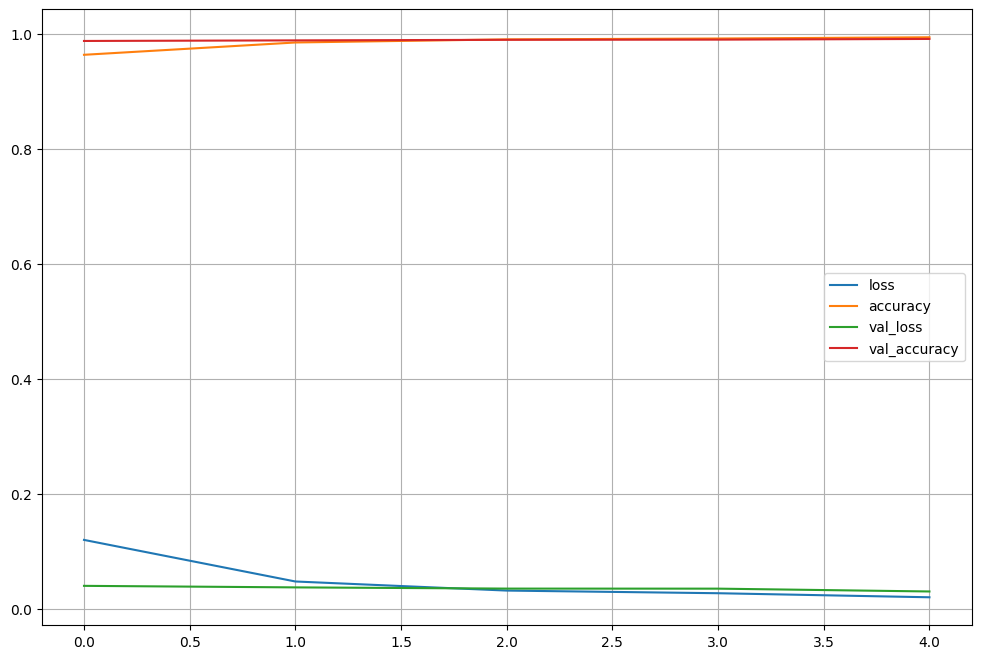

In [19]:
plot_target = ['loss', 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12,8))
for each in plot_target:
  plt.plot(hist.history[each])

plt.grid()
plt.legend(plot_target)
plt.show()

In [21]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 2s 6ms/step - loss: 0.0297 - accuracy: 0.9906


[0.02974139340221882, 0.9905999898910522]

In [23]:
predicted_result = model.predict(X_test)
predicted_label = np.argmax(predicted_result, axis = 1)


313/313 [==============================] - 2s 5ms/step


In [30]:
wrong_result = []

for n in range(0, len(y_test)):
  if predicted_label[n]!=y_test[n]:
    wrong_result.append(n)

samples = random.choices(population = wrong_result, k=10)


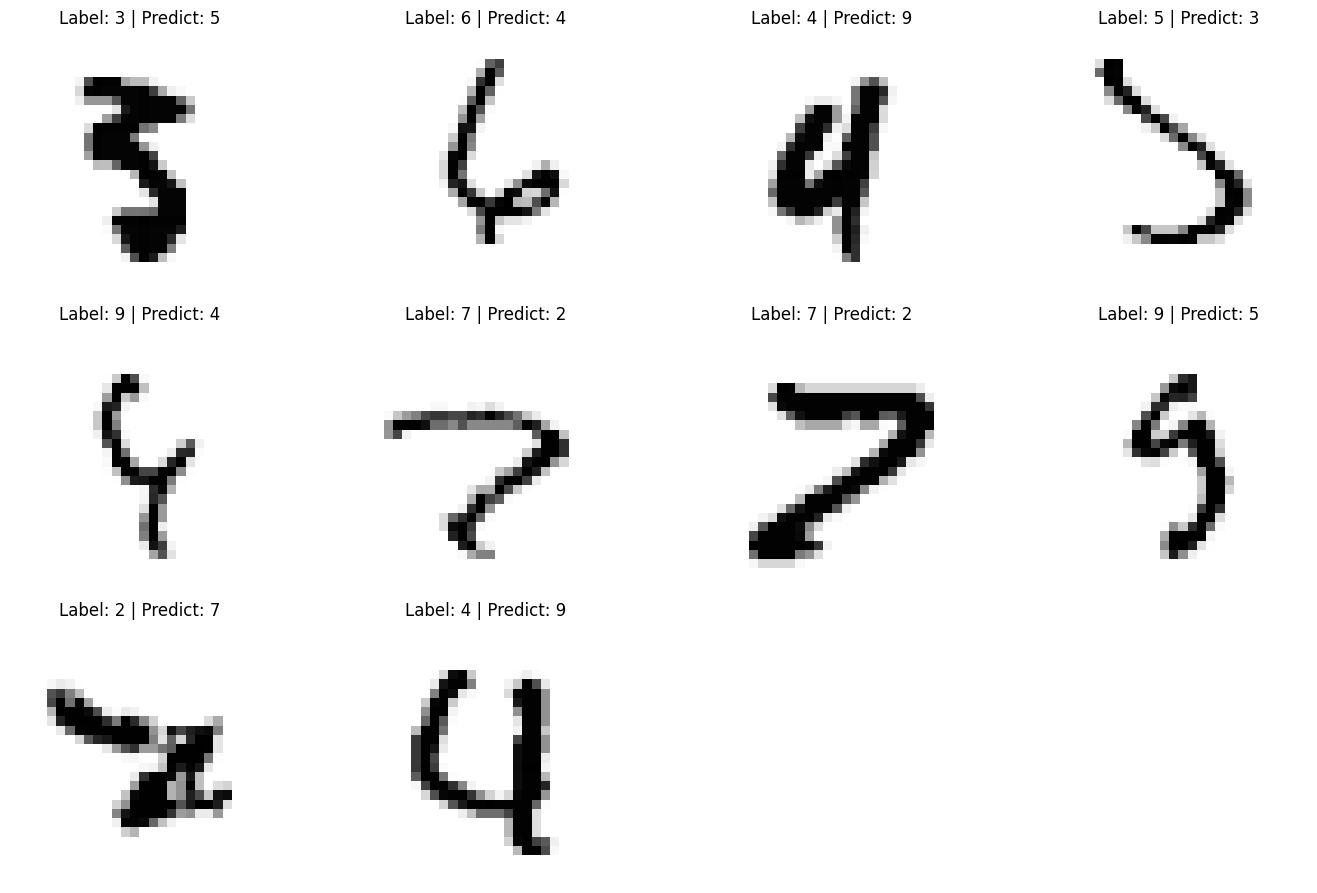

In [31]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
  plt.subplot(4, 4, idx+1)
  plt.imshow(X_test[n].reshape(28,28), cmap='Greys')
  plt.title('Label: ' + str(y_test[n]) + ' | Predict: ' + str(predicted_label[n]))
  plt.axis('off')

plt.tight_layout()
plt.show()

### 모델 저장

In [ ]:
model.save('MNIST_CNN_model.h5')